In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Expert/Downloads/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

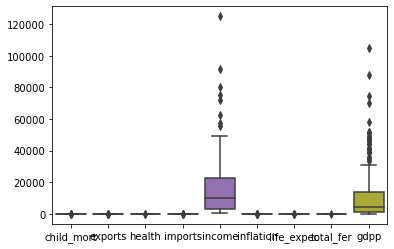

In [9]:
sns.boxplot(data=df)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["country"]=le.fit_transform(df["country"])

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
from sklearn.cluster import KMeans

# Elbow Method

In [13]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

# Elbow plot

([<matplotlib.axis.XTick at 0x168bd55d8e0>,
 <a list of 10 Text major ticklabel objects>)

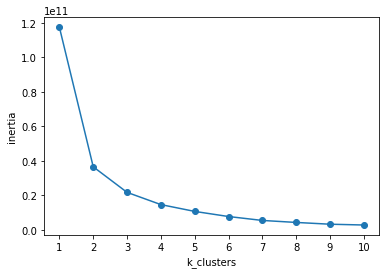

In [14]:
plt.plot(k,ssd,marker="o")
plt.xlabel("k_clusters")
plt.ylabel("inertia")
plt.xticks(k)

In [15]:
#4 is selected as optimal k value

In [16]:
model=KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [17]:
model.labels_

array([1, 1, 1, 1, 3, 3, 1, 0, 0, 1, 3, 3, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       0, 1, 1, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 1, 1, 3, 1, 1,
       1, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 1, 3,
       1, 0, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 0, 0, 0, 3, 1, 1, 3, 1, 1, 1])

In [18]:
model.n_iter_

4

In [19]:
output=df
output["label_groups"]=model.labels_

In [20]:
output.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label_groups
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


# Selecting Two Important Features for Visualization Of Cluster

In [21]:
#country,income are two selected important features

In [22]:
df1=df[["country","income"]]

In [23]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

([<matplotlib.axis.XTick at 0x168bd9eb820>,
 <a list of 10 Text major ticklabel objects>)

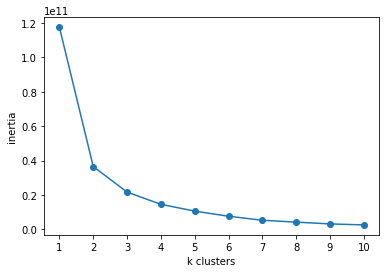

In [24]:
plt.plot(k,ssd,marker="o")
plt.xlabel("k clusters")
plt.ylabel("inertia")
plt.xticks(k)

In [25]:
model=KMeans(n_clusters=4)
model.fit(df1)

KMeans(n_clusters=4)

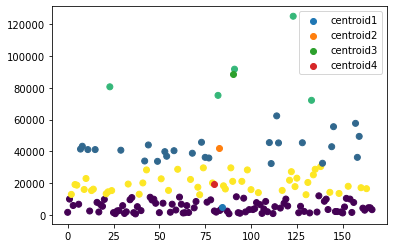

In [26]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=model.labels_)
centroid=model.cluster_centers_
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.legend()

In [27]:
model.cluster_centers_

array([[8.42417582e+01, 4.84025275e+03],
       [8.24230769e+01, 4.22153846e+04],
       [9.04000000e+01, 8.89200000e+04],
       [8.00000000e+01, 1.95666667e+04]])